In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid')

In [7]:
#Data from Kaggle

df = pd.read_csv(r'C:\Users\kaif\Downloads\housing 2.csv')
df.dropna(inplace=True)

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df = df.drop('ocean_proximity', axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\Users\kaif\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


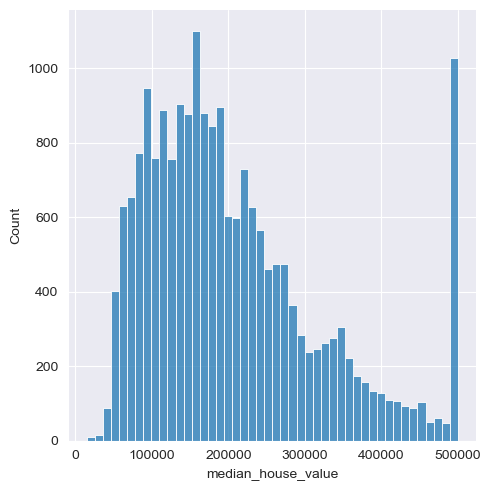

In [10]:
sns.displot(df['median_house_value'])

<Axes: xlabel='median_house_value', ylabel='total_rooms'>

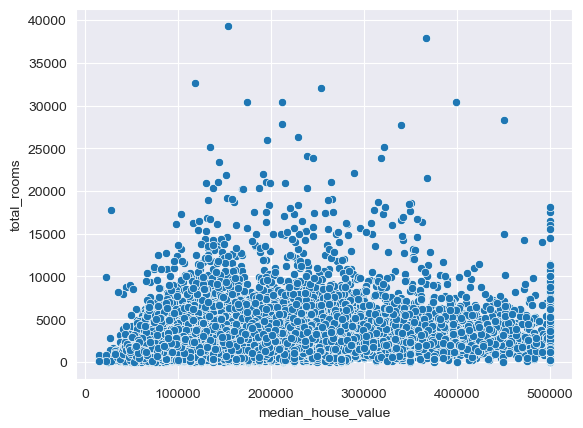

In [11]:
sns.scatterplot(x='median_house_value', y='total_rooms', data=df)

In [12]:
inputs = df.drop('median_house_value', axis=1)

output = df['median_house_value']
output.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [13]:
#Partition the data for training

from sklearn.model_selection import train_test_split

inputs_train, inputs_test, output_train, output_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

inputs_train_scaled = scaler.fit_transform(inputs_train)
inputs_test_scaled = scaler.transform(inputs_test)

In [15]:
#from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import EarlyStopping

In [18]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

stop = EarlyStopping(monitor='val_loss', mode='min', verbose=True, patience=10)

In [19]:
model.fit(x=inputs_train_scaled, y=output_train.values, validation_data=(inputs_test_scaled, output_test.values), batch_size=128, epochs=300, callbacks=[stop], verbose=True)

Epoch 1/300

112/112 [==============================] - 2s 6ms/step - loss: 56288157696.0000 - val_loss: 55719657472.0000
Epoch 2/300
112/112 [==============================] - 0s 4ms/step - loss: 56287961088.0000 - val_loss: 55719366656.0000
Epoch 3/300
112/112 [==============================] - 0s 4ms/step - loss: 56287412224.0000 - val_loss: 55718514688.0000
Epoch 4/300
112/112 [==============================] - 0s 4ms/step - loss: 56286097408.0000 - val_loss: 55716577280.0000
Epoch 5/300
112/112 [==============================] - 1s 5ms/step - loss: 56283504640.0000 - val_loss: 55713112064.0000
Epoch 6/300
112/112 [==============================] - 0s 4ms/step - loss: 56278904832.0000 - val_loss: 55707619328.0000
Epoch 7/300
112/112 [==============================] - 0s 4ms/step - loss: 56272183296.0000 - val_loss: 55699492864.0000
Epoch 8/300
112/112 [==============================] - 0s 4ms/step - loss: 56262533120.0000 - val_loss: 55688351744.0000
Epoch 9/300
112/112 [==========

112/112 [==============================] - 0s 4ms/step - loss: 48640159744.0000 - val_loss: 47391293440.0000
Epoch 67/300
112/112 [==============================] - 0s 4ms/step - loss: 48221454336.0000 - val_loss: 47103893504.0000
Epoch 68/300
112/112 [==============================] - 0s 4ms/step - loss: 48136814592.0000 - val_loss: 46818942976.0000
Epoch 69/300
112/112 [==============================] - 0s 4ms/step - loss: 47918772224.0000 - val_loss: 46530969600.0000
Epoch 70/300
112/112 [==============================] - 0s 3ms/step - loss: 47664275456.0000 - val_loss: 46237650944.0000
Epoch 71/300
112/112 [==============================] - 0s 4ms/step - loss: 47195668480.0000 - val_loss: 45935378432.0000
Epoch 72/300
112/112 [==============================] - 0s 4ms/step - loss: 47020412928.0000 - val_loss: 45631123456.0000
Epoch 73/300
112/112 [==============================] - 0s 4ms/step - loss: 46877741056.0000 - val_loss: 45326110720.0000
Epoch 74/300
112/112 [===============

Epoch 133/300
112/112 [==============================] - 0s 4ms/step - loss: 37623955456.0000 - val_loss: 27418208256.0000
Epoch 134/300
112/112 [==============================] - 1s 4ms/step - loss: 37728010240.0000 - val_loss: 27289176064.0000
Epoch 135/300
112/112 [==============================] - 0s 4ms/step - loss: 37082898432.0000 - val_loss: 27173214208.0000
Epoch 136/300
112/112 [==============================] - 0s 4ms/step - loss: 37477363712.0000 - val_loss: 27058509824.0000
Epoch 137/300
112/112 [==============================] - 1s 5ms/step - loss: 37689946112.0000 - val_loss: 26976778240.0000
Epoch 138/300
112/112 [==============================] - 1s 5ms/step - loss: 37445869568.0000 - val_loss: 26878410752.0000
Epoch 139/300
112/112 [==============================] - 0s 4ms/step - loss: 37145169920.0000 - val_loss: 26789693440.0000
Epoch 140/300
112/112 [==============================] - 0s 4ms/step - loss: 37861167104.0000 - val_loss: 26737920000.0000
Epoch 141/300
11

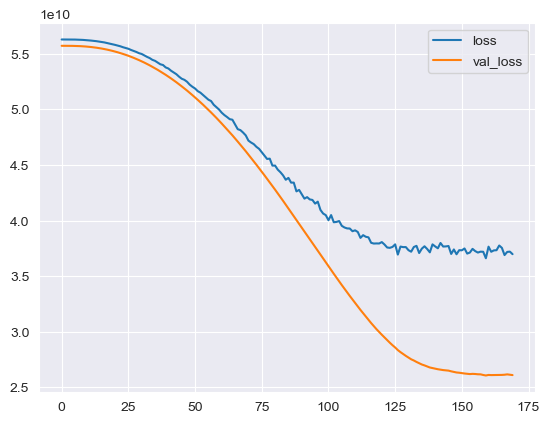

In [20]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.show()

In [21]:
predictions = model.predict(inputs_test_scaled)

# for i in range(predictions.size):
#     print(predictions[i])
#     print("vs")
#     print(output_test.values[i])
#     print("\n")
    
#Not looking too good

192/192 [==============================] - 1s 2ms/step


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Avg Absolute Error: ", mean_absolute_error(output_test, predictions))

print("Avg Squared Error: ", np.sqrt(mean_squared_error(output_test, predictions)))


Avg Absolute Error:  121085.99266032831
Avg Squared Error:  161575.96896686938
